# In this notebook, we will select the CBC host galaxies to make up the CBC catalogs used in this analysis

The SNR thresholds
- BBH: S/N>9
- NSBH: S/N>8

In [212]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import healpy as hp
import ligo.skymap.plot as ligoPlot

mpl.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",  # or "sans-serif" or "monospace"
    "font.serif": ["Computer Modern Roman"],
    "axes.labelsize": 12,
    "font.size": 12,
    "legend.fontsize": 10,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10
})

plt.style.use("seaborn-v0_8-paper")

NSBHFilePath = "/global/homes/s/seanmacb/DESC/DESC-GW/gwStreetlights/data/mockCBCCatalogs/n=1e7,NSBHs,FromSkySim50_withBilbySNRs.csv"
BBHFilePath = "/global/homes/s/seanmacb/DESC/DESC-GW/gwStreetlights/data/mockCBCCatalogs/n=1e7,BBHs,FromSkySim50_withBilbySNRs.csv"
outPath = "catalogList"

In [54]:
BBH_DF = pd.read_csv(BBHFilePath)
NSBH_DF = pd.read_csv(NSBHFilePath)

In [141]:
def makeMask(df,threshold):
    cnd1 = np.array([x>2 for x in df["Individual SNR minimum"]])
    cnd2 = np.array([x>threshold for x in df["Network SNR"]] )
    cnd3 = np.array([x<=0 for x in df["mdec"]])
    cnd4 = np.array([(x<90 and x>0) for x in df['mra']])
    for cnd in [cnd2,cnd3,cnd4]:
        cnd1 = np.logical_and(cnd1,cnd)
    return cnd1

In [142]:
NSMask = makeMask(NSBH_DF,8)
BBHMask = makeMask(BBH_DF,9)

In [143]:
BBHSubsetDF = BBH_DF[BBHMask]
NSBHSubsetDF = NSBH_DF[NSMask]

In [199]:
def makeHist(df,binName,binNum,rang,titl):
    fig,ax = plt.subplots(figsize=[10,5])

    ax.hist(df[binName],bins=binNum,range=rang,
            color='C0',
        edgecolor='black',
        linewidth=0.6,
        alpha=0.8,
        histtype='stepfilled')  # Use 'step' for outlined)

    ax.tick_params(axis='both', which='major', labelsize=10, direction='in', length=6)
    ax.tick_params(axis='both', which='minor', length=3)
    
    ax.set_xlabel(binName)
    ax.set_title(titl)
    ax.set_ylabel("Counts")
    ax.grid(ls='--',which='major')
    ax.minorticks_on()
    ax.grid(ls='-.',which='minor',alpha=0.2)
    plt.tight_layout()
    return ax,fig

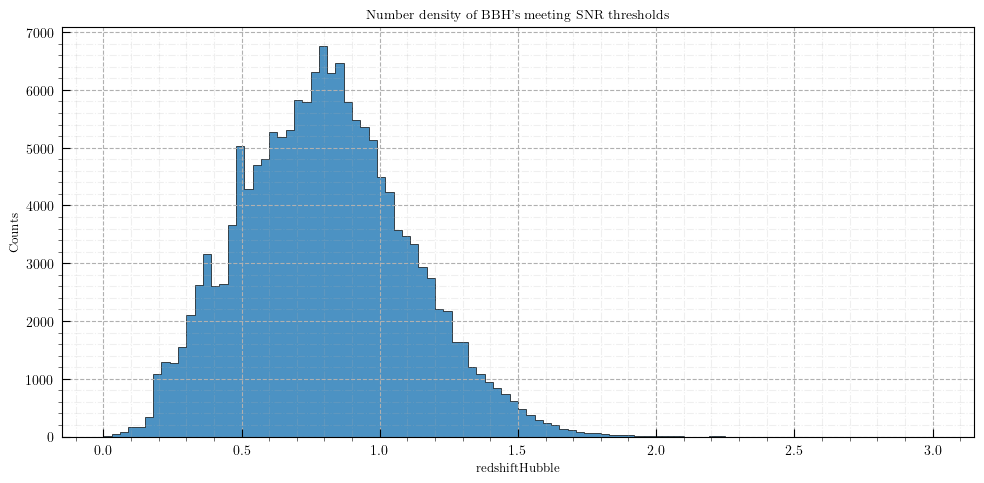

In [200]:
BBHfig,BBHax = makeHist(BBHSubsetDF,"redshiftHubble",100,[0,3],"Number density of BBH's meeting SNR thresholds")

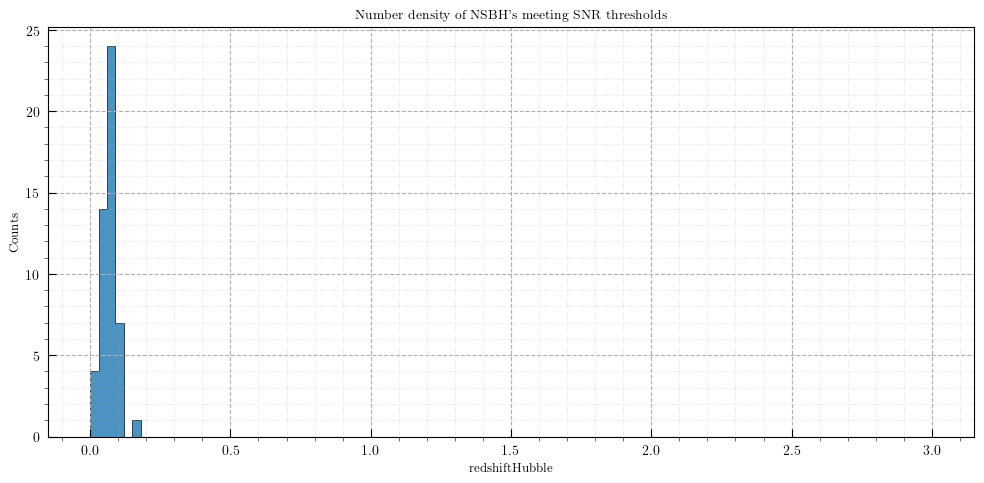

In [201]:
NSBHfig,NSBHax = makeHist(NSBHSubsetDF,"redshiftHubble",100,[0,3],"Number density of NSBH's meeting SNR thresholds")

In [202]:
def sample_n_rows(df: pd.DataFrame, n: int, random_state: int = None) -> pd.DataFrame:
    """
    Return a new DataFrame with N randomly selected rows from the input DataFrame.

    Parameters
    ----------
    df : pd.DataFrame
        The input DataFrame.
    n : int
        The number of rows to randomly select.
    random_state : int, optional
        Seed for reproducibility. Default is None.

    Returns
    -------
    pd.DataFrame
        A new DataFrame with N randomly sampled rows.
    """
    return df.sample(n=n, random_state=random_state).reset_index(drop=True)

## First batch of BBH's, restricted to RA/dec range of the full 

In [203]:
sampleNum = 300

In [180]:
firstSample = sample_n_rows(BBHSubsetDF,sampleNum)

In [204]:
np.min(firstSample['Network SNR']),np.min(firstSample['Individual SNR minimum']),np.min(firstSample['mra']),np.min(firstSample['mdec']),np.max(firstSample['mra']),np.max(firstSample['mdec'])

(9.003199881776041,
 2.1031617004527683,
 0.5042272491555195,
 -89.46783336027875,
 89.9554046689882,
 -0.5190532729466213)

In [205]:
np.max(firstSample["Individual SNR minimum"]),np.max(firstSample["Network SNR"])

(52.822208256296186, 109.15502873991444)

(<Axes: title={'center': 'Network SNR distribution'}, xlabel='Network SNR', ylabel='Counts'>,
 <Figure size 1000x500 with 1 Axes>)

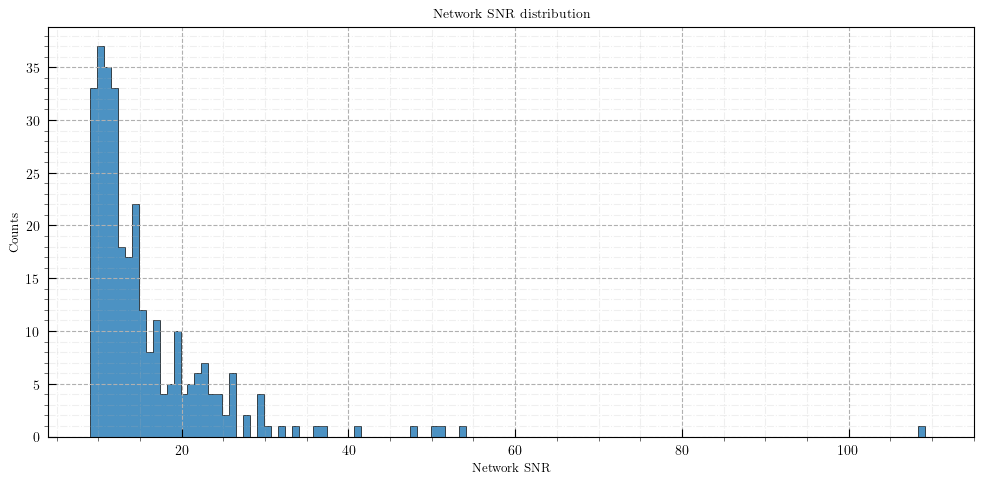

In [206]:
makeHist(firstSample,"Network SNR",121,[9,110],"Network SNR distribution")

(<Axes: title={'center': 'Individual SNR minimum'}, xlabel='Individual SNR minimum', ylabel='Counts'>,
 <Figure size 1000x500 with 1 Axes>)

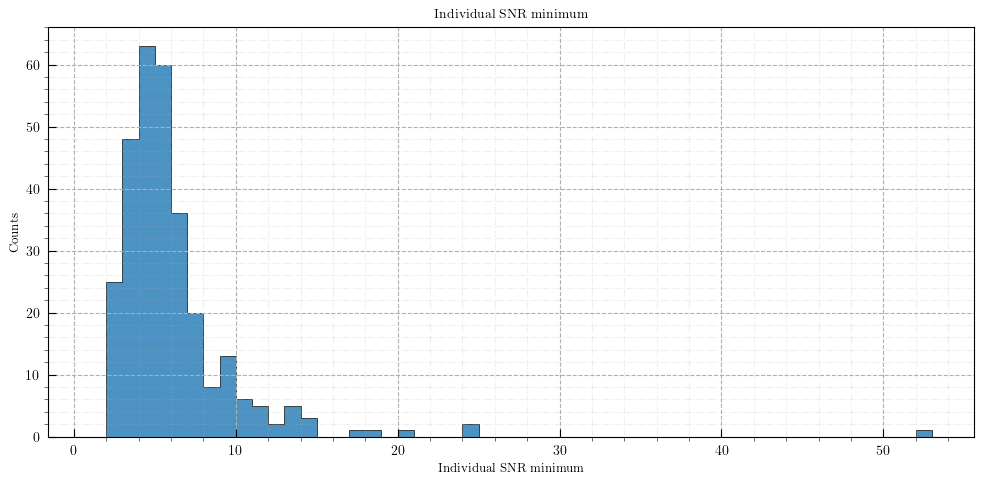

In [207]:
makeHist(firstSample,"Individual SNR minimum",52,[1,53],"Individual SNR minimum")

(<Axes: title={'center': 'Redshift distribution of batch of 300 BBHs'}, xlabel='redshiftHubble', ylabel='Counts'>,
 <Figure size 1000x500 with 1 Axes>)

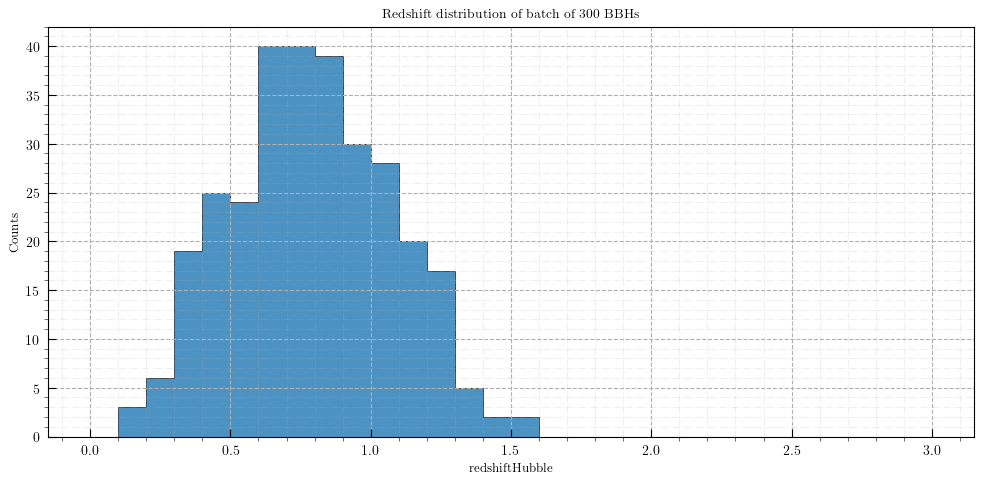

In [208]:
makeHist(firstSample,"redshiftHubble",30,[0,3],"Redshift distribution of batch of {} BBHs".format(sampleNum))

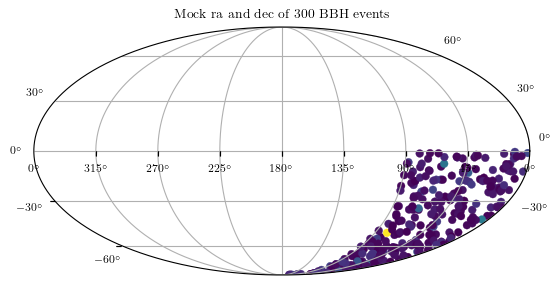

In [234]:
ax = plt.axes(projection='astro degrees mollweide')
ax.set_title("Mock ra and dec of {} BBH events".format(sampleNum))
ax.grid("-.")
ax.scatter(firstSample["mra"],firstSample["mdec"],c=firstSample["Network SNR"],transform=ax.get_transform('world'))

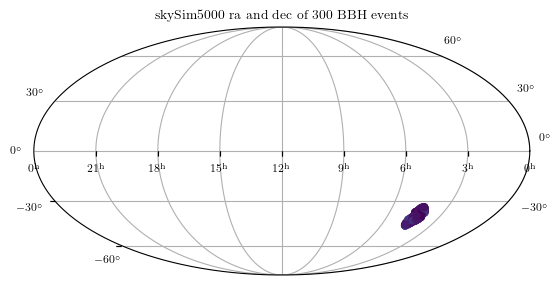

In [233]:
ax = plt.axes(projection='astro hours mollweide')
ax.set_title("skySim5000 ra and dec of {} BBH events".format(sampleNum))
ax.grid("-.")
ax.scatter(firstSample["ra"],firstSample["dec"],c=firstSample["Network SNR"],transform=ax.get_transform('world'))

In [242]:
firstSample.to_csv(os.path.join(os.getcwd(),outPath,"BBH_Batch0.csv"),index=False)